# Project: Earnings Based on College Majors

In this project I will analyze a dataset to find out:

* Do students in more popular majors make more money?
* How many majors are predominantly male? Female?
* Which category of majors have the most students

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

recent_grads = pd.read_csv('recent-grads.csv')

print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())
print(recent_grads.shape)
recent_grads = recent_grads.dropna()
print(recent_grads.shape)


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

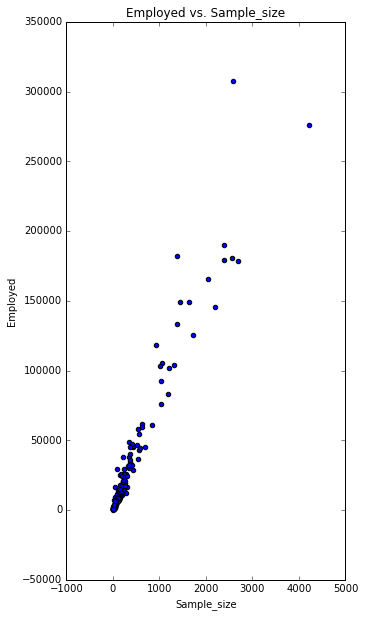

In [2]:
ax = recent_grads.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter', figsize = (5,10))
ax.set_title('Employed vs. Sample_size')

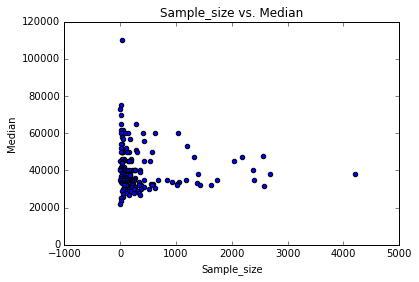

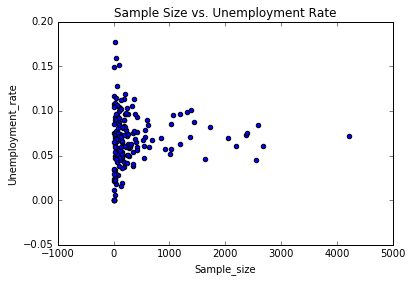

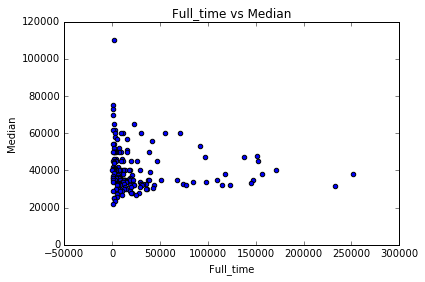

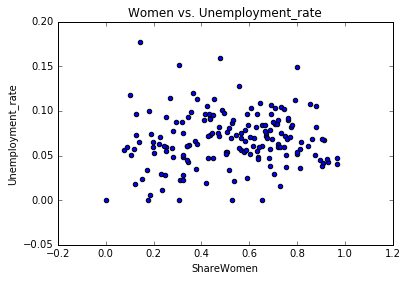

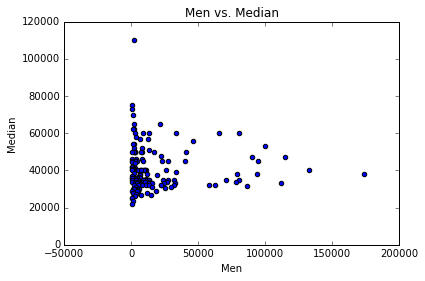

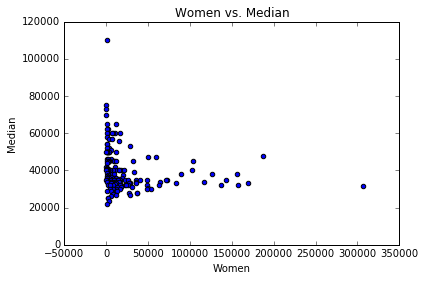

In [3]:
recent_grads.plot('Sample_size', 'Median', kind = 'scatter', title = 'Sample_size vs. Median')
recent_grads.plot('Sample_size', 'Unemployment_rate', kind = 'scatter', title = 'Sample Size vs. Unemployment Rate')
recent_grads.plot('Full_time', 'Median', kind = 'scatter', title = 'Full_time vs Median')
recent_grads.plot('ShareWomen', 'Unemployment_rate', kind = 'scatter', title = 'Women vs. Unemployment_rate')
recent_grads.plot('Men', 'Median', kind = 'scatter', title = 'Men vs. Median')
recent_grads.plot('Women', 'Median', kind = 'scatter', title = 'Women vs. Median')

* People in more popular majors seem to be making less money
* People in majors with a majority of women make less money
* More full time does not mean more money

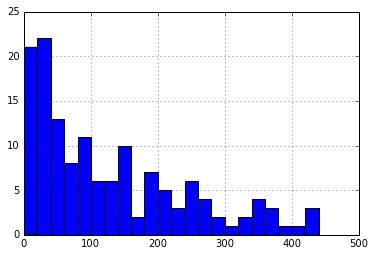

In [7]:
recent_grads['Sample_size'].hist(bins = 25, range = (0, 500))

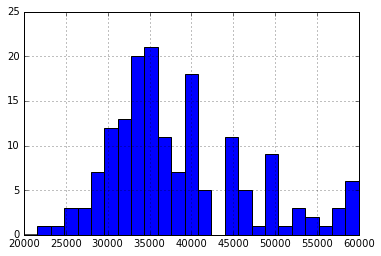

In [9]:
recent_grads['Median'].hist(bins = 25, range = (20000,60000))

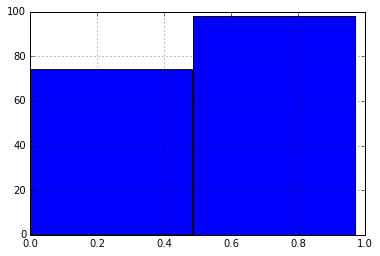

In [12]:
recent_grads['ShareWomen'].hist(bins = 2)

This 100/170 majors are predominantly female

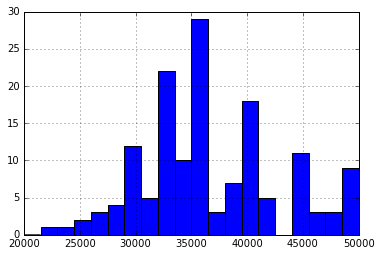

In [15]:
recent_grads['Median'].hist(range = (20000,50000), bins = 20)

The most common median income is around 35000-3600 Canadian ruples

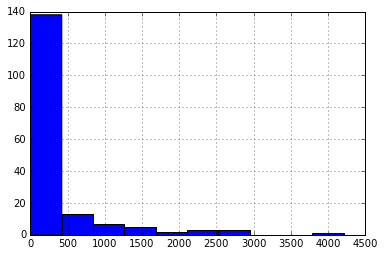

In [16]:
recent_grads['Sample_size'].hist()

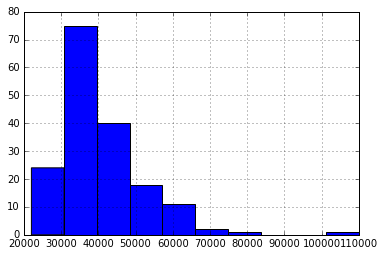

In [18]:
recent_grads['Median'].hist()

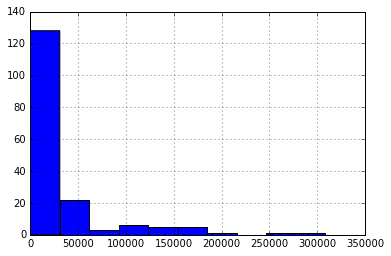

In [19]:
recent_grads['Employed'].hist()

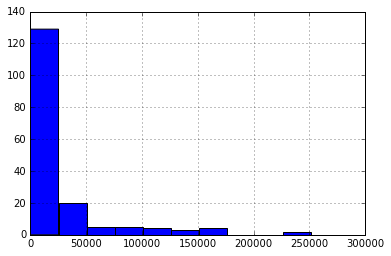

In [20]:
recent_grads['Full_time'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a8a3eb70>,
      dtype=object)

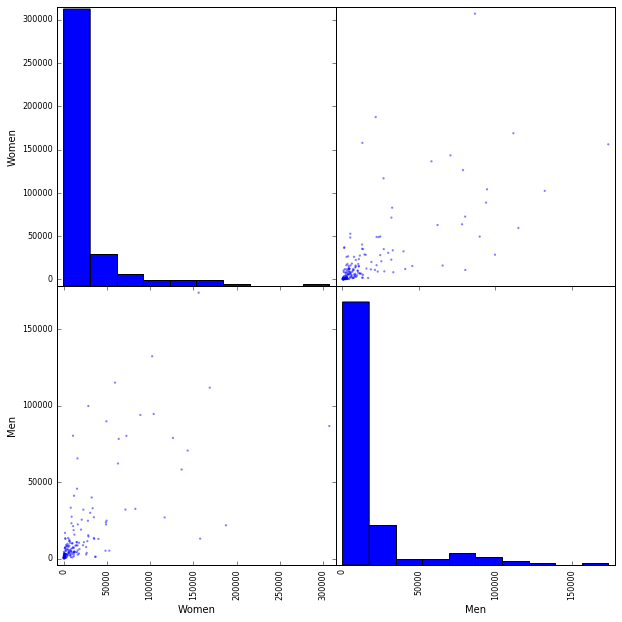

In [22]:
pd.plotting.scatter_matrix(recent_grads[['Women', 'Men']], figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a882ca20>,
      dtype=object)

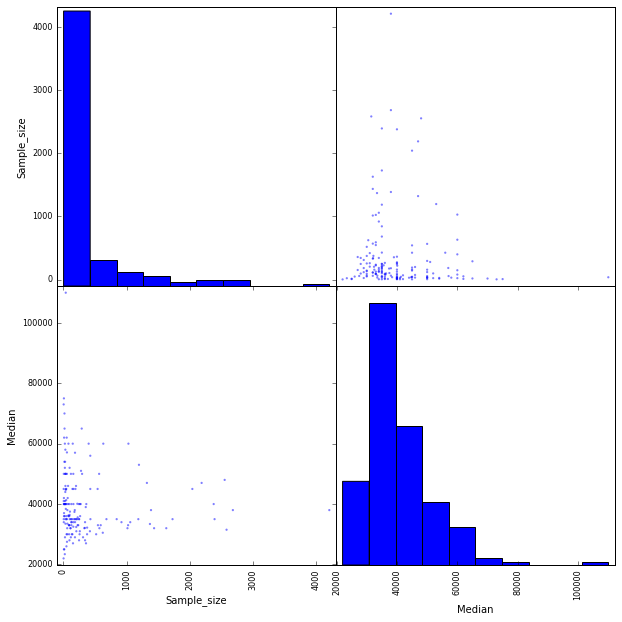

In [24]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size','Median']],figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a86e1a20>,
      dtype=object)

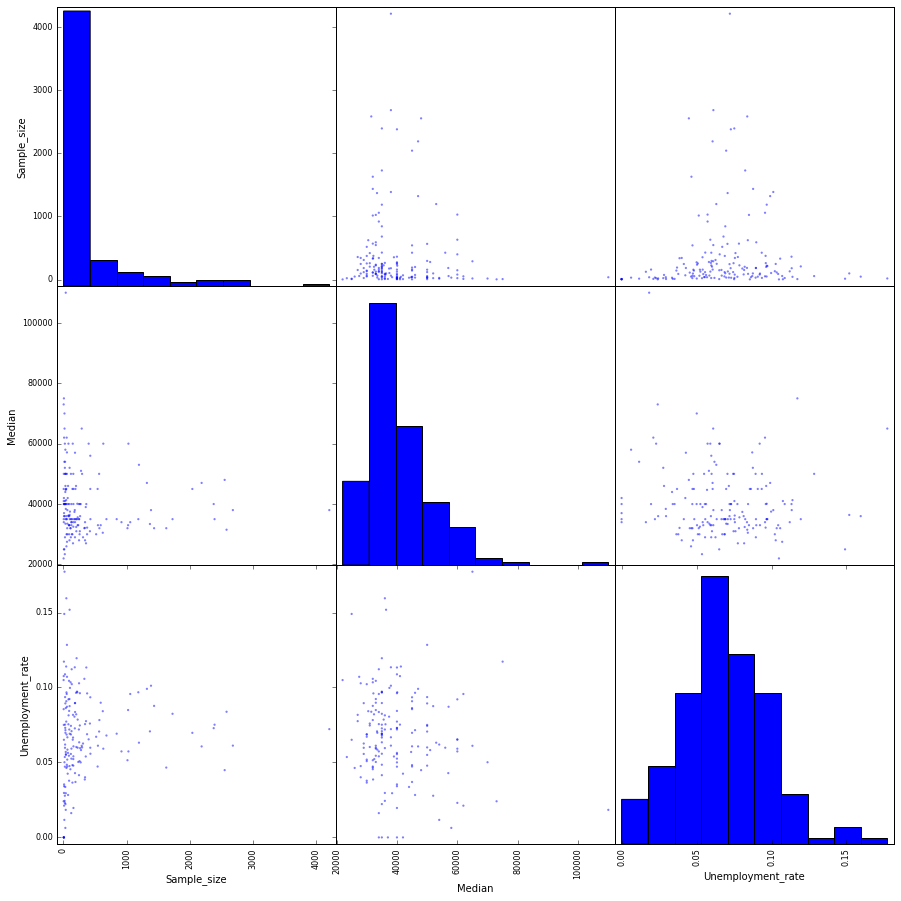

In [27]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']],figsize = (15,15))

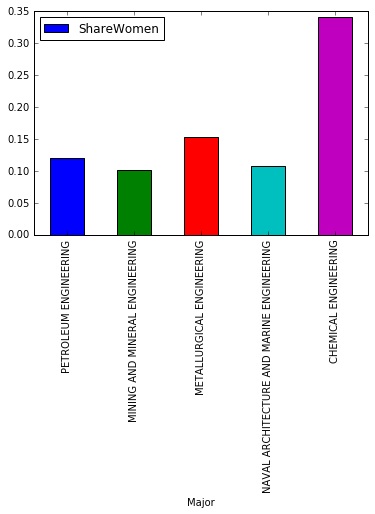

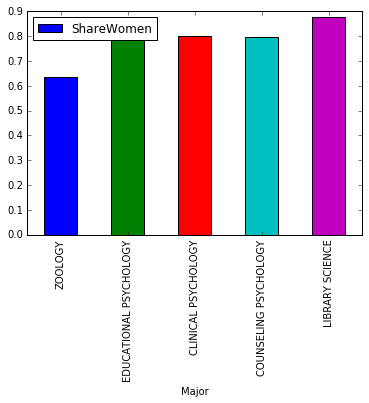

In [29]:
recent_grads[:5].plot.bar(x = 'Major', y = 'ShareWomen')
recent_grads[-5:].plot.bar(x = 'Major', y = 'ShareWomen')

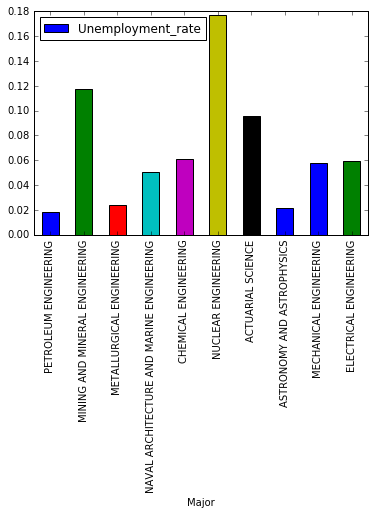

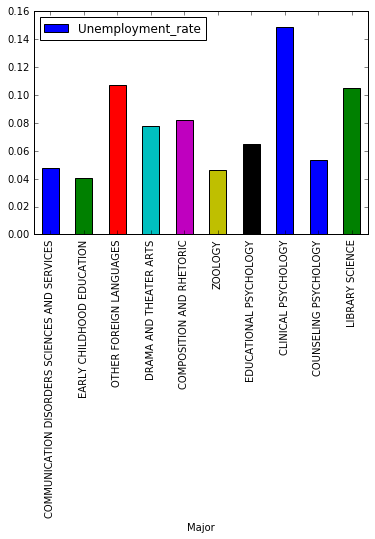

In [36]:
recent_grads[:10].plot.bar(x = 'Major', y = 'Unemployment_rate')
recent_grads[-10:].plot.bar(x = 'Major', y = 'Unemployment_rate')